In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set(style="darkgrid")

Set parameters to fit the type of neuron of choice:

In [2]:
##Parameters of the spiking neuron
rest = -60.
thres = -40.
capacitance = 100
leak = 0.7
a = 0.03
b = -2
peak = 35
reset = -50.
d = 100.

params = [rest, thres, capacitance, leak, a, b, peak, reset, d]

In [3]:
##Updates the states of the neuron
def updateIzh(params,inp, V, u, step):
    V1 = V +step* ((params[3]*(V-(params[0]))*(V-(params[1])) - u + inp)/params[2])
    u +=  step*params[4] *(params[5]*(V-(params[0]))-u)

    if V1 > params[6]:
        V1 = params[7]
        u += params[8]
    return V1,u

In [56]:
membraneHist = []

##Initial state
V =-60. 
u = 0. 

steps = 1000
time = range(steps)

Text(0, 0.5, 'Membrane Potential')

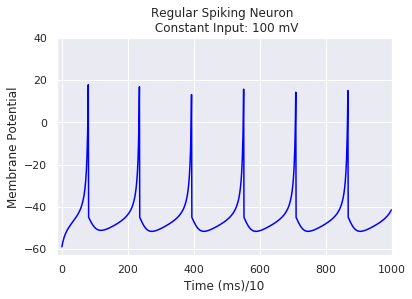

In [57]:
for t in time:
    
    inp = 100
   
    V, u  = updateIzh(params,inp,V, u, 0.1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -63, 40])
plt.title('Regular Spiking Neuron \n Constant Input: 100 mV')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')

Simulate regular spiking neuron with random input

Text(0, 0.5, 'Membrane Potential')

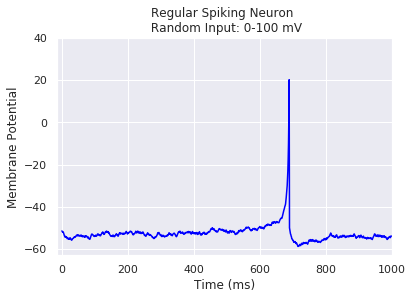

In [6]:
membraneHist = []
for t in time:
    
    inp = random.randint(0,100)
   
    V, u  = updateIzh(params,inp,V, u, 0.1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -63, 40])
plt.title('Regular Spiking Neuron \n Random Input: 0-100 mV')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')

Text(0, 0.5, 'Membrane Potential')

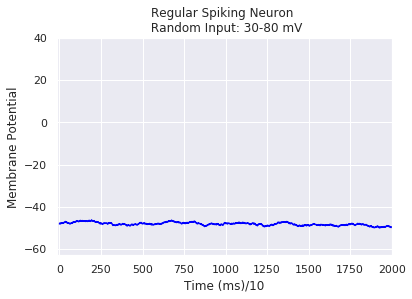

In [54]:
membraneHist = []
steps = 2000
time = range(steps)
for t in time:
    inp = random.randint(30,98)
   
    V, u  = updateIzh(params,inp,V, u, 0.1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -63, 40])
plt.title('Regular Spiking Neuron \n Random Input: 30-80 mV')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')

Simulating fast spiking interneuron

In [42]:
##Parameters of the spiking neuron
rest = -55.
thres = -40.
capacitance = 20
leak = 1
a = 0.2
b = 1
peak = 25
reset = -45.
d = 100.

params = [rest, thres, capacitance, leak, a, b, peak, reset, d]

Text(0, 0.5, 'Membrane Potential')

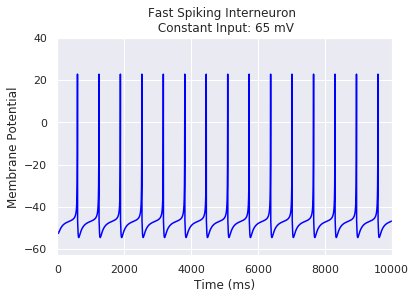

In [46]:
membraneHist = []
steps = 10000
time = range(steps)
for t in time:
    
    inp = 65
   
    V, u  = updateIzh(params,inp,V, u, 0.1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -63, 40])
plt.title('Fast Spiking Interneuron \n Constant Input: 65 mV')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')

Simulating chattering neuron

In [24]:
##Parameters of the spiking neuron
rest = -60.
thres = -40.
capacitance =50
leak = 1.5
a = 0.03
b = 1.
peak = 25
reset = -40.
d = 150.

params = [rest, thres, capacitance, leak, a, b, peak, reset, d]

Text(0, 0.5, 'Membrane Potential')

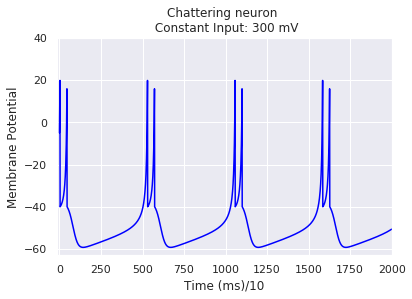

In [36]:
steps = 2000
time = range(steps)
membraneHist = []
for t in time:
    
    inp = 300
   
    V, u  = updateIzh(params,inp,V, u, 0.1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -63, 40])
plt.title('Chattering neuron \n Constant Input: 300 mV')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')

Simulating Intrinsically Bursting Neuron:
For this type of neuron, the simple model described in the

updateIzh() function above is not sufficient.
Therefore, a new function  - updateIB() - needs to be defined.

In [119]:
##Updates the states of the neuron
def updateIB(inp, V, u, Vd,ud, step):
    V1 = V + step * (3*(V+70)*(V+45)+50*(Vd - V) - u + inp)/150
    u += step * 0.01*(5*(V+70)-u)
    Vd1 = Vd + step * ((Vd +50)**2 + 20*(V-Vd) - ud)/30
    ud += step * 3*(15*(Vd+50)-ud)
    
    if V1 > 50:
        V1 = -52
        u += 240
    if Vd1 > 20:
        Vd1 = -20
        ud += 500
    
    return V1,u, Vd1, ud

Text(0.5, 0, 'Time (ms)/10')

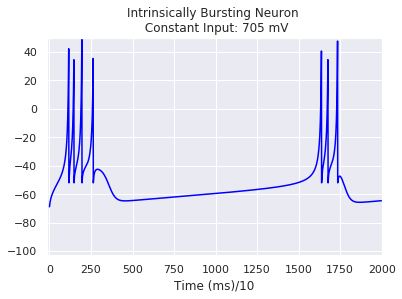

In [128]:
V = -70
u = 0
Vd = -50
ud = 0

steps = 2000
time = range(steps)
membraneHist = []
for t in time:
    inp = 705
    
    V, u,Vd,ud  = updateIB(inp,V, u, Vd,ud, .1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -103, 50])
plt.title('Intrinsically Bursting Neuron \n Constant Input: 705 mV')
plt.xlabel('Time (ms)/10')

Simulating Late Spiking Neuron

In [132]:
def updateLS(inp, V, u, Vd, step):
    V1 = V + step * (0.3*(V+66)*(V+40)+1.2*(Vd-V)-u+inp)/20
    u += step * 0.17*(5*(V+66)-u)
    Vd1 = Vd + step * 0.01*(V-Vd)
    
    if V1 > 30:
        V1 = -45
        u=+100

    return V1, u, Vd1

Text(0.5, 0, 'Time (ms)/10')

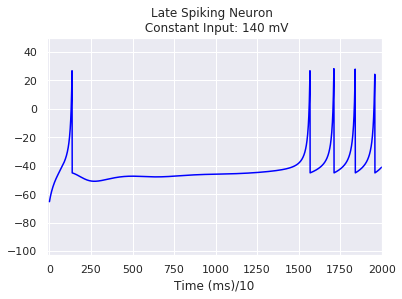

In [257]:
V = -66
u = 0
Vd = -66

steps = 2000
time = range(steps)
membraneHist = []

for t in time:
    inp = 145
    
    V, u,Vd= updateLS(inp,V, u, Vd, .1)
    membraneHist.append(V)

    
plt.plot(time, membraneHist, c='blue')

plt.axis([-15,steps, -103, 50])
plt.title('Late Spiking Neuron \n Constant Input: 140 mV')
plt.xlabel('Time (ms)/10')

Simulating thalamocortical cell (TC)

In [198]:
def updateTC(inp, V,u,b,step):
    V1 = V + step * (1.6*(V+60)*(V+50)-u+inp)/200
    u1 = u * step * 0.01*(b*(V+65)-u)
    
    if V1 > (35 + 0.1*u):
        V1 = (-60- 0.1*u)
        u1 += 10
    return V1, u1

Text(0.5, 0, 'Time (ms)/10')

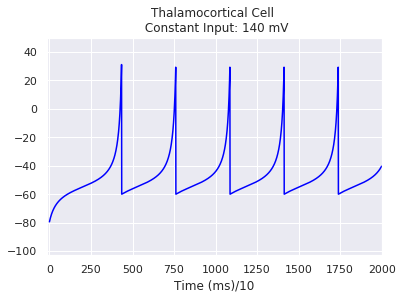

In [201]:
V = -80
u = 0


steps = 2000
time = range(steps)
membraneHist = []

for t in time:
    inp = 140
    
    
    if V < -65:
        b=15
    else:
        b=0
    
    V, u= updateTC(inp,V, u, b, .1)
    membraneHist.append(V)

    
plt.plot(time, membraneHist, c='blue')

plt.axis([-15,steps, -103, 50])
plt.title('Thalamocortical Cell \n Constant Input: 140 mV')
plt.xlabel('Time (ms)/10')

Simulating Stellate Neurons - Showing a so called "rebound spike" after release of inhibition

In [185]:
##Parameters of the spiking neuron
rest = -60.
thres = -45.
capacitance =200
leak = 0.75
a = 0.01
b = 15
peak = 30
reset = -50.
d = 0

params = [rest, thres, capacitance, leak, a, b, peak, reset, d]

Text(0, 0.5, 'Membrane Potential')

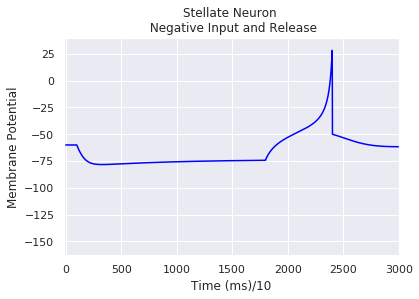

In [219]:
steps = 3000
time = range(steps)
membraneHist = []
V = -60
u = 0
for t in time:
    
    #inp = 170
    #"""
    if t > 100 and t<1800:
        inp = -500
    else:
        inp = 0
    #"""
   
    V, u  = updateIzh(params,inp,V, u, .1)
    membraneHist.append(V)
    
plt.plot(time, membraneHist, c='blue')
plt.axis([-15,steps, -163, 40])
plt.title('Stellate Neuron \n Negative Input and Release')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')

Simulating Mitral Neurons

In [240]:
def updateMit(inp, V, u, Vd,  step):
    
    if V < -48:
        U = 0
    else:
        U = 20*(V+48)

    
    V1 = V + step * ((V+55)*(V+50)+0.5*(Vd-V)-u+inp)/40
    u += step * 0.4*(U-u)
    Vd1 = Vd + step * 0.0125*(V-Vd)
    
    if V1 > 35:
        V1 = -50
    
    return V1, u, Vd1

Text(0, 0.5, 'Membrane Potential')

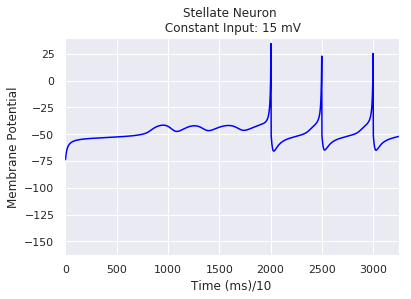

In [256]:
steps = 3250
time = range(steps)
membraneHist = []
VdHist = []

V = -75
u = 0
Vd = -75
for t in time:
    
    inp = 15
    
    
    V, u, Vd  = updateMit(inp,V, u, Vd, .1)
    membraneHist.append(V)
  
plt.plot(time, membraneHist, c='blue')

plt.axis([-15,steps, -163, 40])
plt.title('Stellate Neuron \n Constant Input: 15 mV')
plt.xlabel('Time (ms)/10')
plt.ylabel('Membrane Potential')